# Polynomial regression

To obtain an optimized curve instead of a linear line, we can utilize LinearRegression for **polynomal regression**. For example, to fit a 2nd order polynomial $y = ax^2 + bx+ c$ to the data, we need to expand the training and test arrays to include the $x^2$ terms (of the input variable $x$). This is achieved by using np.column_stack() to stack the sqaured term and the original input variable horizontally, as shown below:

```python
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
```

After this transformation, the shape of each array changes from (-1,1) to (-1,2), allowing the regression model to incorporate the quadratic term.

1.0143321093767301 -21.55792497883735 116.05021078278264


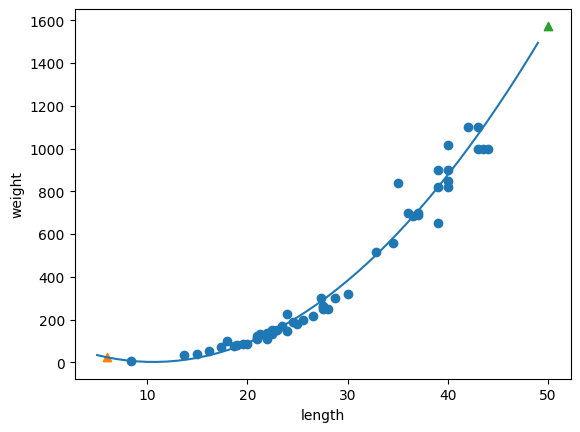

6cm perch will weigh [[23.21861685]]g.
50cm perch will weigh [[1573.98423528]]g.


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#data : perch length and weight
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

# converts (length, ) into (length, 1)
perch_length = perch_length.reshape(-1,1)
perch_weight = perch_weight.reshape(-1,1)

#input: perch_length & target: perch_weight
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# expand the arrays to include squared terms
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

# declare the model
lr = LinearRegression()

# training the model
lr.fit(train_poly, train_target)

# new data
perchA_length = 6
perchB_length = 50

perchA_lengthAr = np.array([perchA_length]).reshape(-1,1)
perchB_lengthAr = np.array([perchB_length]).reshape(-1,1)

# predictions 
perchA_weightAr = lr.predict([[perchA_length**2, perchA_length]])
perchB_weightAr = lr.predict([[perchB_length**2, perchB_length]])

# coefficients
print(lr.coef_[0][0], lr.coef_[0][1], lr.intercept_[0])

# to represent a curve on a scatter plot, define points for the x-axis
xPoint = np.arange(5,50)

plt.scatter(perch_length, perch_weight)
plt.scatter(perchA_lengthAr, perchA_weightAr, marker='^')
plt.scatter(perchB_lengthAr, perchB_weightAr, marker='^')
plt.plot(xPoint, lr.coef_[0][0]*xPoint**2 + lr.coef_[0][1]*xPoint + lr.intercept_[0])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(f"{perchA_length}cm perch will weigh {perchA_weightAr}g.")
print(f"{perchB_length}cm perch will weigh {perchB_weightAr}g.")

After training, we can check the R2 scores for the training and test sets. We observe that still the test set has a higher score compared to the training set, which may indicates a potential underfitting issue. Underfitting implies that the model is too simplistic or not complex enough to effectively learn from the data.

In [35]:
# R^2 scores
score_by_training = lr.score(train_poly, train_target)
score = lr.score(test_poly, test_target)
print(f"score : {score_by_training} (training data)")
print(f"score : {score} (test data)")

score : 0.9706807451768623 (training data)
score : 0.9775935108325122 (test data)
